# Principal Component Analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot = False)

target_idx = np.where(mnist.train.labels<2)[0]
foreground = mnist.train.images[target_idx,:][:2000]
target_labels = mnist.train.labels[target_idx][:2000]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


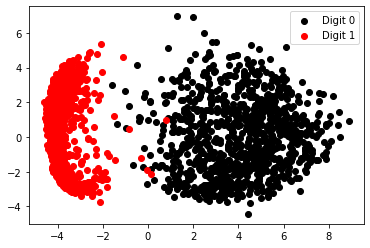

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fg = pca.fit_transform(foreground)
colors = ['k','r']

for i, l in enumerate(np.sort(np.unique(target_labels))):
    plt.scatter(fg[np.where(target_labels==l),0],fg[np.where(target_labels==l),1], 
                color=colors[i], label='Digit ' +str(l))
plt.legend()

In [6]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

target_idx = np.where(mnist.train.labels<2)[0]
foreground = mnist.train.images[target_idx,:][:5000]
target_labels = mnist.train.labels[target_idx][:5000]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


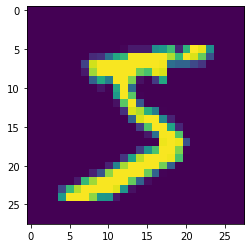

In [12]:
import gzip
f = gzip.open('./MNIST_data/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 10000

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)
image = np.asarray(data[0]).squeeze()
plt.imshow(image)
im = Image.fromarray(image)
im = im.convert('RGB')
im.save("./MNIST_data/image1.jpeg")

In [13]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

target_idx = np.where(mnist.train.labels<2)[0]
foreground = mnist.train.images[target_idx,:][:5000]
target_labels = mnist.train.labels[target_idx][:5000]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


1599 963


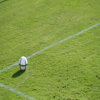

AD5NOgEm.jpg
football.jpeg
Z3d-render-help-calligraphic-with-human-hand-pen-tool-created-clipping-path-included-jpeg-easy-composite_460848-6310.jpg
ZZ3d-render-metal-helping-center-pen-tool-created-clipping-path-included-jpeg-easy-composite.jpg
ZZZ3d-render-new-text-calligraphic-pen-tool-created-clipping-path-included-jpeg-easy-composite.jpg
Array of grass images: (5, 10000)


In [202]:
from PIL import Image
import requests
from io import BytesIO

h = { 'User-Agent': 'Neo'}
r = requests.get("http://images.freeimages.com/images/large-previews/85c/football-1442407.jpg", headers=h)
i = Image.open(BytesIO(r.content))
width, height = i.size
print(width, height)
i = i.resize((100,100))
display(i)
i.save("football.jpeg")

#from utils import resize_and_crop
import os

IMAGE_PATH = '../z004ek3a/'         
natural_images = list() #dictionary of pictures indexed by the pic # and each value is 100x100 image
for filename in os.listdir(IMAGE_PATH):
  if filename.endswith(".jpeg") or filename.endswith(".JPG") or filename.endswith(".jpg"):
      try:
        print(filename)
        im = Image.open(os.path.join(IMAGE_PATH,filename))
        im = im.convert(mode="L") #convert to grayscale
        im = im.resize((100,100))
        #im = resize_and_crop(im) #resize and crop each picture to be 100px by 100px
        natural_images.append(np.reshape(im, [10000]))
      except Exception as e:
          print(e)
          pass
            
natural_images=np.asarray(natural_images,dtype=float)
natural_images/=255 #rescale to be 0-1
print("Array of grass images:", natural_images.shape)

In [203]:
np.random.seed(0) # for reproducibility

rand_indices =  np.random.permutation(natural_images.shape[0]) # just shuffles the indices
split = int(len(rand_indices)/2)
target_indices = rand_indices[0:split] # choose the first half of images to be superimposed on target
background_indices = rand_indices[split:] # choose the second half of images to be background dataset

target = np.zeros(foreground.shape)
background = np.zeros(foreground.shape)

for i in range(target.shape[0]):
    idx = np.random.choice(target_indices) # randomly pick a image 
    loc = np.random.randint(70,size=(2)) # randomly pick a region in the image
    superimposed_patch = np.reshape(np.reshape(natural_images[idx,:],[100,100])[loc[0]:loc[0]+28,:][:,loc[1]:loc[1]+28] ,[1,784])    
    target[i] = 0.25*foreground[i] + superimposed_patch
    
    idx = np.random.choice(background_indices) # randomly pick a image 
    loc = np.random.randint(70,size=(2)) # randomly pick a region in the image
    background_patch = np.reshape(np.reshape(natural_images[idx,:],[100,100])[loc[0]:loc[0]+28,:][:,loc[1]:loc[1]+28] ,[1,784])    
    background[i] = background_patch

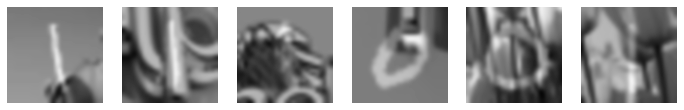

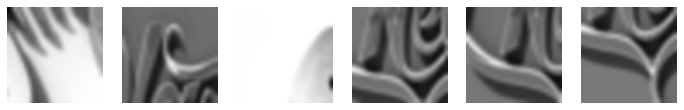

In [204]:
n_show=6

plt.figure(figsize=[12,12])
for i in range(n_show):
    plt.subplot(1, n_show, i+1)
    idx=np.random.randint(5000)
    plt.imshow(np.reshape(target[idx,:],[28,28]),cmap='gray', interpolation="bicubic")
    plt.axis('off')

plt.figure(figsize=[12,12])
for i in range(n_show):
    plt.subplot(1, n_show, i+1)
    idx=np.random.randint(5000)
    plt.imshow(np.reshape(background[idx,:],[28,28]),cmap='gray', interpolation="bicubic")
    plt.axis('off')

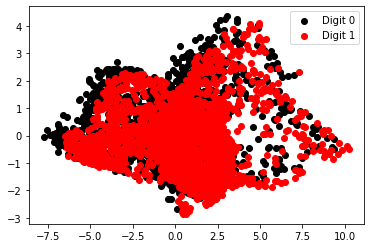

In [205]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fg = pca.fit_transform(target)

for i, l in enumerate(np.sort(np.unique(target_labels))):
    plt.scatter(fg[np.where(target_labels==l),0],fg[np.where(target_labels==l),1], 
                color=colors[i], label='Digit ' +str(l))
plt.legend()

# Contrasting Principal Component Analysis

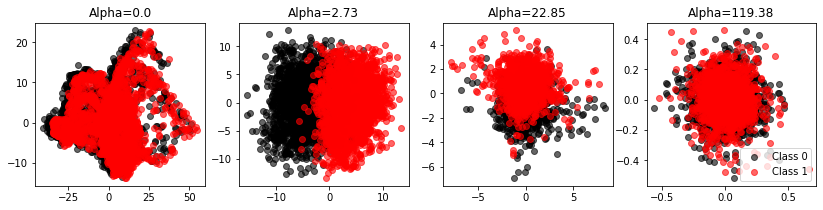

In [206]:
from contrastive import CPCA

mdl = CPCA()
projected_data = mdl.fit_transform(target, background, plot=True, active_labels=target_labels)

Text(0.5, 1.0, 'Contributions of Pixels to cPC1')

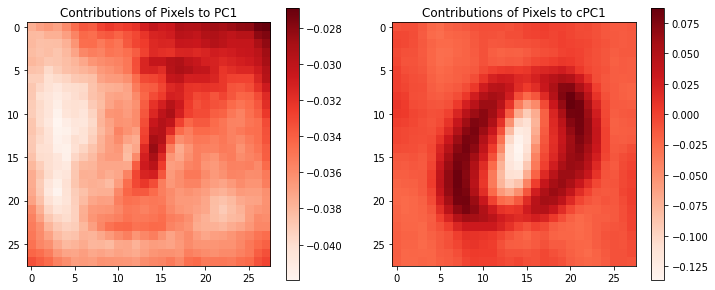

In [209]:
plt.figure(figsize=[12,5])
w, v = np.linalg.eig(mdl.fg_cov)
idx = np.argmax(w)
plt.subplot(1,2,1)
plt.imshow(v[:,idx].reshape(28,28),cmap='Reds')
plt.colorbar()
plt.title('Contributions of Pixels to PC1')

w, v = np.linalg.eig(mdl.fg_cov - 2.73*mdl.bg_cov) # the value 4.38 is taken from the previous diagram, where alpha=4.38 separates the clusters most clearly
idx = np.argmax(w)
plt.subplot(1,2,2)
plt.imshow(v[:,idx].reshape(28,28),cmap='Reds')
plt.colorbar()
plt.title('Contributions of Pixels to cPC1')

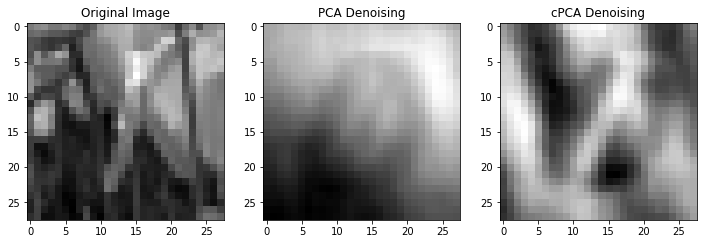

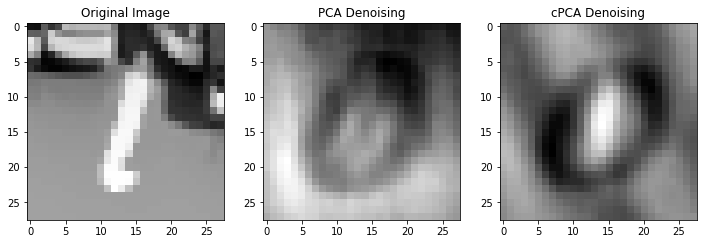

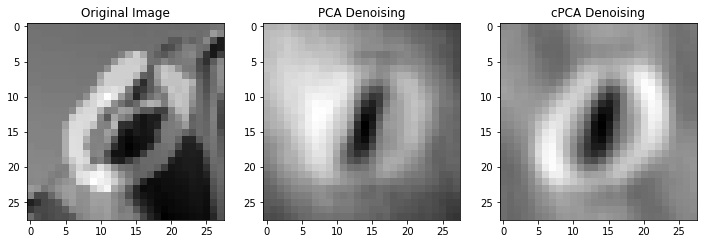

In [213]:
n_components = 4
for idx in range(3):
    image = target[idx:idx+1]
    plt.figure(figsize=[12,12])
    plt.subplot(1,3,1)
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.title('Original Image')

    w, v = np.linalg.eig(mdl.fg_cov)
    indices = np.argsort(w)[::-1][:n_components]
    image_ = image.dot(v[:,indices])
    image_ = image_.dot(v[:,indices].T) #keep only the top components of the image
    plt.subplot(1,3,2)
    plt.imshow(image_.reshape(28,28),cmap='gray')
    plt.title('PCA Denoising')

    w, v = np.linalg.eig(mdl.fg_cov - 2.73*mdl.bg_cov) # the value 4.38 is taken from the plot that is two plots previous to this one, where alpha=4.38 separates the clusters most clearly
    indices = np.argsort(w)[::-1][:n_components]
    image_ = image.dot(v[:,indices])
    image_ = image_.dot(v[:,indices].T) #keep only the top components of the image
    plt.subplot(1,3,3)
    plt.imshow(image_.reshape(28,28),cmap='gray')
    plt.title('cPCA Denoising')